## <span style="font-family:Georgia, serif;">**Twitter Sentiment Analysis** :Understanding Emotions in Tweets about Apple and Google products.</span>

![alt text](twits.jpg "Title")

## Overview

In this project, we will begin by constructing a straightforward baseline model for sentiment prediction, categorizing sentiments as either positive or negative. Subsequently, we will advance our approach by building a more sophisticated model capable of recognizing sentiments as positive, negative, or neutral. Our methodology will heavily rely on Natural Language Processing (NLP) techniques to preprocess the text data into a format suitable for model interpretation.

In the modeling phase, we will employ both supervised and unsupervised learning techniques. On the supervised front, we will create a pipeline that integrates multiple classifiers, enabling us to evaluate their performance through cross-validation scores. In the unsupervised domain, we will develop a neural network that functions similarly to the classifiers, utilizing it for sentiment prediction on textual data.

Leveraging our neural network, we will carry out sentiment predictions for a document and conduct evaluations specifically focused on product-related sentiments.

## Business Understanding

**Business Problem**: Using Sentiment Analysis to Improve Apple and Google Product Marketing Strategies 

The introduction of social media has completely changed how businesses interact with their consumers and the general public in today's connected society. While the digital age offers limitless possibilities for marketing and brand development, it also brings its own set of difficulties. One of these difficulties is the inability of enterprises to precisely gauge public opinion and feelings towards their goods or services.

In the age of social media, organizations are acutely aware of the need to harness the wealth of sentiment and emotion data available on these platforms. However, they often struggle to do so effectively, given the unprecedented speed, diversity, and complexity of social media communication. The dynamic nature of the medium, the diverse and contextual language used, the rapid increase of emojis and visual content, the volume of noise, and ethical concerns all contribute to the challenge of gauging public sentiment and emotions. 

To overcome these challenges, organizations must invest in advanced sentiment analysis tools and technologies, develop cultural and linguistic expertise, and strike a balance between data-driven insights and ethical considerations. By doing so, they can unlock the valuable insights hidden within the social media storm and use them to inform strategic decisions, enhance products and services, and build stronger connections with their audience in this rapidly evolving digital landscape.




## Data understanding

**Dataset Overview:**
This dataset comprises 8,721 entries organized into three distinct columns: tweet_text, emotion_in_tweet_is_directed_at, and is_there_an_emotion_directed_at_a_brand_or_product. Each entry in the dataset represents a tweet along with associated metadata regarding the product or brand it's directed at and the emotional sentiment conveyed within the tweet.

**Column Descriptions:**

`tweet_text:`

The tweet_text column contains the textual content of individual tweets. These tweets are typically concise, informal expressions shared by users on a social media platform, such as Twitter. Each tweet serves as a snapshot of a user's thoughts, opinions, or experiences related to a particular product or brand.
The textual data within this column can vary in length, language, and complexity. It may include hashtags, mentions of other users, URLs, and a wide range of linguistic elements.
Analysis of the tweet text can provide valuable insights into the sentiments, opinions, or feedback expressed by users regarding the product or brand.

`emotion_in_tweet_is_directed_at:`

The emotion_in_tweet_is_directed_at column provides information about the specific product or brand mentioned or targeted by each tweet. This column serves as a categorical label indicating the entity towards which the emotion or sentiment expressed in the tweet is directed.
Entries in this column may include the names or identifiers of various products or brands, allowing for the categorization of tweets based on the entity they reference.
Understanding which products or brands are most frequently mentioned in tweets can help identify consumer preferences and the areas where sentiment analysis may be most relevant.

`is_there_an_emotion_directed_at_a_brand_or_product:`

The is_there_an_emotion_directed_at_a_brand_or_product column characterizes the emotional sentiment or tone conveyed within each tweet directed at a product or brand.
This column serves as a crucial indicator of the emotional context of the tweets and can be categorized into several classes, including:

* Positive: Tweets expressing favorable sentiments, such as satisfaction, excitement, or endorsement, towards the product or brand.

* Negative: Tweets containing unfavorable sentiments, such as criticism, frustration, or dissatisfaction, directed at the product or brand.

* No Emotion: Tweets that do not convey any discernible emotional sentiment. These tweets may provide neutral or factual information.

* Not Clear: Tweets where the emotional tone is ambiguous or unclear, making it challenging to determine the sentiment.

Analyzing this column allows for sentiment classification and provides valuable insights into how consumers perceive and react to products or brands in the context of social media.
Dataset Size:

The dataset contains a total of 8,721 entries, each representing a unique tweet. This dataset size is substantial and provides a rich source of data for sentiment analysis and brand/product perception studies.

**Data Exploration and Analysis:**

To gain a deeper understanding of the dataset and its implications, exploratory data analysis (EDA) techniques, natural language processing (NLP) methods, and sentiment analysis tools can be applied.
EDA involves a series of techniques and methods to gain insights into the structure, content, and patterns within the textual information. Here's a step-by-step guide on how to apply EDA to text data:

## Data Preparation

**Loading Relevant Libraries**

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from nltk.collocations import BigramCollocationFinder
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk

from keras.layers import Dense,Dropout 
from keras.models import Sequential

from scipy.sparse import csr_matrix
from gensim.models import Word2Vec

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import requests
import pickle
import string
import re
import io

import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')
# nltk.download('punkt')
# nltk.download('stopwords')

**Data Loading and Overview:** Here we begin by loading our text data into a preferred data analysis environment (e.g., Python with pandas).The data has non UTF-8 characters so we first create a function that removes the non UTF-8 characters.

In [146]:

def remove_non_utf8(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

with open('data/judge_1377884607_tweet_product_company.csv', 'r', encoding='utf-8') as file:
    cleaned_text = remove_non_utf8(file.read())

df = pd.read_csv(io.StringIO(cleaned_text))
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [147]:
#renaming the column 'is_there_an_emotion_directed_at_a_brand_or_product' to 'Sentiment'.

column_name_mapping = {'is_there_an_emotion_directed_at_a_brand_or_product': 'Sentiment'}
df.rename(columns=column_name_mapping, inplace=True)

In [148]:
#filling in missing (NaN) values with the string 'N/A' 

df['emotion_in_tweet_is_directed_at'].fillna('N/A', inplace=True)
df['tweet_text'].fillna('N/A', inplace=True)

In [149]:

def assign_brand(phrase):
    """ 
    Takes in a phrase as input and returns
    a brand label based on certain keywords found in the phrase.
    """
    if 'iPad' in phrase or 'iPhone' in phrase :
        return 'Apple'
    elif 'Other Apple product or service' in phrase or 'Apple' in phrase:
        return 'Apple' 
    elif 'iPad or iPhone App' in phrase:
        return 'Apple'       
    elif 'Google' in phrase or 'Other Google product or service' in phrase:
        return 'Google'
    elif 'Android App' in phrase or 'Android' in phrase:
        return 'Android'
    else:
        return 'N/A'


#creating a new column called 'brand' that contains the assigned brand labels

df['brand'] = df['emotion_in_tweet_is_directed_at'].apply(assign_brand)

Text Preprocessing:Before conducting EDA, it's crucial to preprocess the text data. Common preprocessing steps include:
* Lowercasing: Convert all text to lowercase to ensure consistency.
* Tokenization: Split text into individual words or tokens.
* Stop Word Removal: Eliminate common and uninformative words like "the," "and," "in.
* Punctuation Removal: Remove special characters, punctuation marks, and symbols.
* Lemmatization or Stemming: Reduce words to their root form for better analysis.

In the cell below we create a functions that integrates the above processes.

In [150]:

def clean_and_preprocess_text(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove mentions (words starting with '@') and URLs
    tokens = [token for token in tokens if not token.startswith('@') and not token.startswith('http')]
    # Remove punctuation and numbers using regular expressions
    tokens = [re.sub(r'[^a-zA-Z]', '', token) for token in tokens]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Apply stemming using the Porter Stemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    cleaned_text = ' '.join(stemmed_tokens) 
    return cleaned_text

In [151]:
#Testing the function
df['tweet_text'][4]

"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)"

In [152]:
clean_and_preprocess_text(df['tweet_text'][4])

'great stuff fri sxsw  marissa mayer  googl   tim oreilli  tech book  confer   matt mullenweg  wordpress '

In [153]:
#creating a new column that contains processed text
df['processed_text'] = df['tweet_text'].map(clean_and_preprocess_text)

Next we are going to define a mapping which associates certain sentiment labels with numerical values.This is essential because NLP involve tasks such as regression that requires integer inputs.We can then use the numbers as reference.In the following mapping,'Positive emotion' is mapped to 1.0,'Negative emotion' is mapped to 0.0, 'No emotion toward brand or product' is mapped to 2.0 and 'I can't tell' is also mapped to 2.0.

In [154]:
# Define a mapping dictionary
sentiment_mapping = {'No emotion toward brand or product': 2.0,
                  'Positive emotion': 1.0, 
                  'Negative emotion': 0.0,
                  'I can\'t tell': 2.0}

# Use the .map() method to map values in column 'Sentiment' to new values
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)
df.sample(5)

,tweet_text,emotion_in_tweet_is_directed_at,Sentiment,brand,processed_text
411,Google to debut new selective social network t...,N/A,2.0,N/A,googl debut new select social network today sx...
2846,2 read l8er RT @mention Marissa Mayer: Google ...,Google,1.0,Google,read ler rt marissa mayer googl connect digi...
5811,RT @mention How to improve website rankings: A...,Google,1.0,Google,rt improv websit rank advic googl bing sxsw ...
3488,Just in time: @mention launch Unofficial #SXSW...,iPhone,1.0,Apple,time launch unoffici sxsw insid guid iphon n...
3027,The line for the iPad 2 at #sxsw. {link},N/A,2.0,N/A,line ipad sxsw link


In subsequent stages of data preparation, we will construct a DataFrame that exclusively contains instances where the sentiment is either positive (1.0) or negative (0.0). This step is crucial for generating a dataset suitable for training our baseline model and assessing its performance when dealing with a binary target variable, specifically 0 or 1.When we get the data we split it into training and test for validation purposes.

In [155]:

#creating new df where sentiment is either positive or negative
bi_tar = df[(df['Sentiment'] == 0)| (df['Sentiment'] == 1)]

X = bi_tar['processed_text']
y = bi_tar['Sentiment']

X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(X, y, test_size=0.2, random_state=42)


In [156]:
#creating data for the iterated model that has multiple classes(targets)
multi_tar = df.copy()
X = multi_tar['processed_text']
y = multi_tar['Sentiment']
#One-hot encoding to ensure that each class label is treated as a separate, independent category. 
y_dummies = pd.get_dummies(y)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_dummies, test_size=0.2, random_state=42)

As previously mentioned, Natural Language Processing (NLP) relies on regression techniques, necessitating the transformation of text data into numerical vectors that machine learning algorithms can comprehend and process effectively. This conversion can be achieved through various methods, such as GloVe (Global Vectors for Word Representation), Word2Vec, TF-IDF (Term Frequency-Inverse Document Frequency), and BERT (Bidirectional Encoder Representations from Transformers). In our particular scenario, we will opt for TF-IDF, which can be seamlessly incorporated into a function designed to convert our text data. This function will also incorporate Compressed Sparse Row (CSR) matrices to transform the TF-IDF training matrix into a space-efficient CSR matrix format.

In [157]:

vectorizer = TfidfVectorizer()

def csr_Tfid_vect(X_train,X_test):
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)

    tf_idf_train = csr_matrix(tf_idf_train)
    tf_idf_test = csr_matrix(tf_idf_test)

    return tf_idf_train,tf_idf_test

X_tf_idf_train_bi,X_tf_idf_test_bi = csr_Tfid_vect(X_train_bi,X_test_bi)

With the provided data and functions, we are prepared to embark on exploratory data analysis (EDA) and commence the modeling process.

## Text Analysis

First we can calculate word frequencies, and print the top 10 most frequent words along with their normalized frequencies

In [158]:

# Concatenate all tweet text into a single string
big_sentence = ' '.join(df['tweet_text'])

# Tokenization pattern
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"

# Tokenize and convert to lowercase
tweets_raw = nltk.regexp_tokenize(big_sentence, pattern)
tweets_raw = [word.lower() for word in tweets_raw]

# Create a list of stopwords and add punctuation
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

# Remove stopwords and punctuation
tweets_raw_stopped = [word for word in tweets_raw if word not in stopwords_list]

# Calculate word frequency distribution
tweets_freqdist = FreqDist(tweets_raw_stopped)

# Calculate total word count
total_word_count = sum(tweets_freqdist.values())

# Get and print the top 10 most frequent words with normalized frequencies
tweets_freqdist_top_10 = tweets_freqdist.most_common(10)
print(f'{"Word":<10} {"Normalized Frequency":<20}')

freq = []
wrd = []
for word in tweets_freqdist_top_10:
    normalized_frequency = word[1] / total_word_count
    freq.append(normalized_frequency)
    wrd.append(word[0])
    print(f'{word[0]:<10} {normalized_frequency:^20.4}')


Word       Normalized Frequency
sxsw              0.0858       
mention          0.06442       
link             0.03821       
rt               0.02743       
ipad             0.02671       
google            0.022        
apple            0.01969       
quot             0.01503       
iphone           0.01414       
store            0.01316       


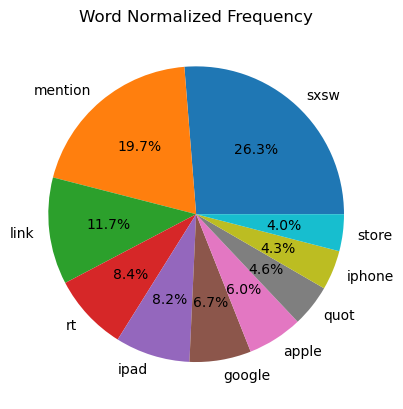

In [159]:

plt.pie(freq, labels=wrd, autopct='%1.1f%%')
plt.title('Word Normalized Frequency')
plt.show()

We can then use NLTK to find and score the top bigram (two-word combinations) collocations in the tweets_raw_stopped text data.

In [160]:

bigram_measures = nltk.collocations.BigramAssocMeasures()
tweets_finder = BigramCollocationFinder.from_words(tweets_raw_stopped)
tweets_scored = tweets_finder.score_ngrams(bigram_measures.raw_freq)
tweets_scored[:5]

[(('rt', 'mention'), 0.02666802617674867),
 (('sxsw', 'link'), 0.008527835968929014),
 (('link', 'sxsw'), 0.007656513598190615),
 (('sxsw', 'rt'), 0.006275374946701025),
 (('mention', 'mention'), 0.005728481118258838)]

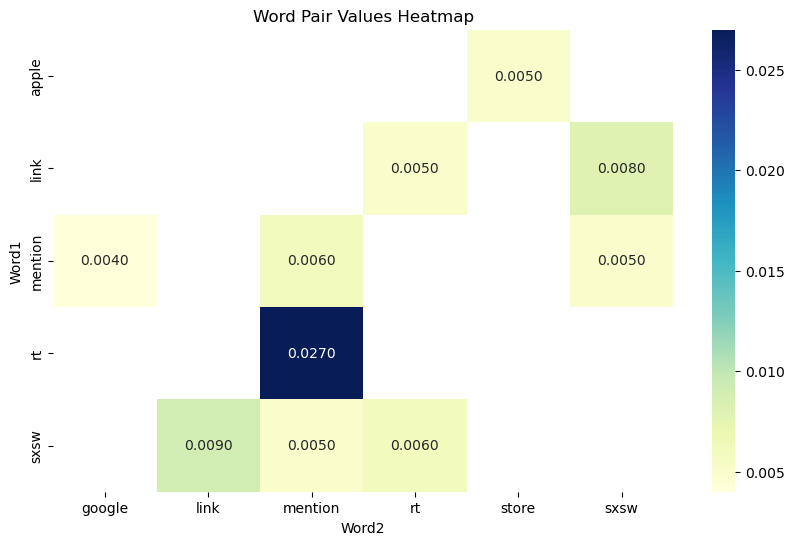

In [161]:

word_pairs = [pair[0] for pair in tweets_scored[:10]]
values = [round(pair[1],3) for pair in tweets_scored[:10]]

# Split the tuples into separate columns
word1, word2 = zip(*word_pairs)
# Create a DataFrame from the data
df_3 = pd.DataFrame({'Word1': word1, 'Word2': word2, 'Values': values})

# Pivot the DataFrame to create a heatmap
pivot_df = df_3.pivot(index='Word1', columns='Word2', values='Values')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".4f")
plt.title('Word Pair Values Heatmap')
plt.show()

SXSW is renowned for its conferences and festivals that commemorate the intersection of technology, film, music, education, and culture.
RT is the inaugural 24/7 English-language news channel from Russia, offering a Russian perspective on worldwide news.

Next we are going to train a Word2Vec model on tokenized text data from the 'processed_text' column of our dataFrame. We can then retrieve the most similar words to specific words from the trained Word2Vec model.

In [162]:

data = df['processed_text'].map(word_tokenize)
model = Word2Vec(data, window=5, min_count=1, workers=4)
model.train(data, total_examples=model.corpus_count, epochs=10)

(708668, 978660)

In [163]:
wv = model.wv
wv.most_similar('sxsw')

[('nothin', 0.6537208557128906),
 ('cnt', 0.6518672704696655),
 ('caught', 0.6376904249191284),
 ('popoup', 0.6372947096824646),
 ('influx', 0.6370160579681396),
 ('fond', 0.6330986022949219),
 ('republican', 0.6304258108139038),
 ('wooooo', 0.6270639300346375),
 ('unit', 0.6230310201644897),
 ('where', 0.6221765875816345)]

In [164]:
wv.most_similar(negative='sxsw')

[('lowest', 0.4581345021724701),
 ('austinwin', 0.3339388072490692),
 ('cosbi', 0.3338419795036316),
 ('itc', 0.2978387475013733),
 ('smscifi', 0.27782055735588074),
 ('linney', 0.27338936924934387),
 ('comedi', 0.25367772579193115),
 ('urbanmyth', 0.23788079619407654),
 ('zm', 0.2121397852897644),
 ('honesti', 0.20288893580436707)]

## Modeling & Evaluation

**Baseline Model**: Sentiment is either positive(1)or negative(0)


Here we are going to set up and evaluate three machine learning models (Random Forest, Support Vector Machine, and Logistic Regression) using cross-validation.The output will provide us with an idea of how well each model is performing on our dataset based on the specified cross-validation scheme (in out case, 2-fold cross-validation). We can assess which model is the most suitable for our specific classification task based on these scores.

In [165]:

rf =  Pipeline([('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Support Vector Machine', SVC())])
lr = Pipeline([('Logistic Regression', LogisticRegression())])

models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]

scores = [(name, cross_val_score(model,X_tf_idf_train_bi, y_train_bi, cv=2).mean()) for name, model, in models]
scores 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


[('Random Forest', 0.8623220118095667),
 ('Support Vector Machine', 0.8582943167130577),
 ('Logistic Regression', 0.8447452254919312)]

Based on these scores, the Random Forest model achieved the highest mean accuracy, followed by the Support Vector Machine and Logistic Regression models. We can use the Random Forest model as our final baseline model.

Moving on we can implement a neural network for our classification task.We can use deep learning libraries such as TensorFlow or PyTorch.In our case we will use keras which was originally developed as a separate library but has been tightly integrated into TensorFlow.We will use a "Sequential" model which is a specific type of neural network architecture available within Keras. It's designed for building feedforward neural networks, where layers are stacked sequentially.


In [166]:
X_tf_idf_train_bi.shape

(2731, 3978)

In [167]:
#converting the csr matrix to array
zty = X_tf_idf_train_bi.toarray()

In [168]:
model_1 = Sequential()

model_1.add(Dense(units=64, input_shape=(3978,)))
model_1.add(Dropout(0.5))

model_1.add(Dense(32, activation='relu'))
model_1.add(Dropout(0.5))

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=["accuracy"]
)

model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                254656    
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 256769 (1003.00 KB)
Trainable params: 256769 (1003.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [169]:
model_1.fit(zty, y_train_bi, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5


77/77 [==============================] - 7s 29ms/step - loss: 0.4969 - accuracy: 0.8368 - val_loss: 0.4058 - val_accuracy: 0.8358
Epoch 2/5
77/77 [==============================] - 2s 23ms/step - loss: 0.3639 - accuracy: 0.8437 - val_loss: 0.3601 - val_accuracy: 0.8358
Epoch 3/5
77/77 [==============================] - 2s 20ms/step - loss: 0.2737 - accuracy: 0.8649 - val_loss: 0.3259 - val_accuracy: 0.8504
Epoch 4/5
77/77 [==============================] - 2s 22ms/step - loss: 0.1815 - accuracy: 0.9377 - val_loss: 0.3163 - val_accuracy: 0.8723
Epoch 5/5
77/77 [==============================] - 1s 19ms/step - loss: 0.1068 - accuracy: 0.9727 - val_loss: 0.3183 - val_accuracy: 0.8723


The model seems to achieve a high accuracy and we can see it is overfitting due to the high validation accuracy.

**Iterated Model**: Sentiment is either positive(1),negative(0),No emotion toward brand or product(2) or Not clear(3)

In [170]:
X_tf_idf_train_multi ,X_tf_idf_test_multi = csr_Tfid_vect(X_train_multi,X_test_multi)

In [171]:
X_tf_idf_train_multi.shape

(6976, 6486)

In [173]:
pty = X_tf_idf_train_multi.toarray()

In [174]:
model_2 = Sequential()

model_2.add(Dense(64, activation='relu', input_shape=(6486,)))
model_2.add(Dropout(0.5))

model_2.add(Dense(3, activation='softmax'))

model_2.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=["accuracy"]
)

model_2.fit(pty, y_train_multi, epochs=5, batch_size=32,validation_split=0.1)

Epoch 1/5
197/197 [==============================] - 17s 69ms/step - loss: 0.8868 - accuracy: 0.6002 - val_loss: 0.8002 - val_accuracy: 0.5845
Epoch 2/5
197/197 [==============================] - 7s 33ms/step - loss: 0.7331 - accuracy: 0.6720 - val_loss: 0.7304 - val_accuracy: 0.6590
Epoch 3/5
197/197 [==============================] - 7s 34ms/step - loss: 0.6175 - accuracy: 0.7531 - val_loss: 0.7021 - val_accuracy: 0.6819
Epoch 4/5
197/197 [==============================] - 7s 34ms/step - loss: 0.5274 - accuracy: 0.7907 - val_loss: 0.6918 - val_accuracy: 0.6905
Epoch 5/5
197/197 [==============================] - 7s 36ms/step - loss: 0.4543 - accuracy: 0.8224 - val_loss: 0.7052 - val_accuracy: 0.6877


The loss is a measure of how well the model is performing. In general, you want the loss to decrease over time as the model learns. Here, the loss starts at 0.8868 in the first epoch and decreases with each subsequent epoch, reaching 0.4543 in the fifth epoch. This indicates that the model is learning and improving its predictions.The training accuracy starts at 0.6002 and increases to 0.8224 by the fifth epoch. Similarly, the validation accuracy starts at 0.5845 and increases to 0.6877 by the fifth epoch. The increasing accuracy on both training and validation sets is generally a positive sign, indicating that the model is learning to make better predictions.It's important to monitor both training and validation metrics. The validation loss and accuracy tell you how well the model is performing on data it hasn't seen during training. In this case, the validation loss starts at 0.8002 and decreases to 0.7052, while the validation accuracy increases from 0.5845 to 0.6877. These trends indicate that the model is not overfitting (i.e., it's not just memorizing the training data) because the validation metrics are also improving.

In [175]:
model_2.predict(X_tf_idf_test_multi.toarray())

55/55 [==============================] - 1s 9ms/step


array([[0.00367443, 0.01575938, 0.98056614],
       [0.00549887, 0.08792806, 0.906573  ],
       [0.13146381, 0.25825146, 0.61028475],
       ...,
       [0.1097504 , 0.42169124, 0.46855837],
       [0.02852591, 0.0315134 , 0.9399607 ],
       [0.02716687, 0.5797536 , 0.39307952]], dtype=float32)

In [176]:

def sentiment_predict(text):
    """ 
    Function that takes in a text and return the depicted sentiment.
    """
    cl_txt = clean_and_preprocess_text(text)
    tfidf_vector_single = vectorizer.transform([cl_txt])
    csr_mat = csr_matrix(tfidf_vector_single)
    csr_array = csr_mat.toarray()
    pred = model_2.predict(csr_array)
    rounded_arr = np.round(pred)

    # Extract the rounded values 
    a, b, c = rounded_arr[0]

    # Determine the sentiment label based on the rounded values
    if a == 1:
        return "Negative"
    elif b == 1:
        return "Positive"
    elif c == 1:
        return "Neutral"
    else:
        return "Unknown"


In [178]:
sentiment_predict('I do not have any feelings towards this product')

1/1 [==============================] - 0s 240ms/step


'Unknown'

In [180]:
sentiment_predict('I hate this product')

1/1 [==============================] - 0s 184ms/step


'Negative'

We can save our model, relieving it from the task of retraining on new data, while simultaneously enabling us to predict sentiment for other text inputs. Additionally, we can preserve the vectorizer, eliminating the need to instantiate a new TF-IDF vectorizer.We will utilize the `pickle` module, which greatly simplifies these tasks.

In [ ]:

# with open('sent_model.pkl', 'wb') as file:
#     pickle.dump(model_2, file)

# file.close()

In [ ]:
# with open('tfidf_vectorizer.pkl', 'wb') as file:
#     pickle.dump(vectorizer, file)

# file.close()    

## Deployment

We can perform model deployment to make it accessible for use in a production environment. Once deployed, the model becomes a practical tool for addressing real-world challenges and making predictions or classifications on new data.

In the following cell, we demonstrate the process by sending an HTTP POST request to a local server to obtain text predictions. This prediction is generated by the model we constructed and integrated into the server. To experiment with it, begin by running the `app.py` file in the directory, and subsequently, uncomment the code below while substituting the tweet text with your own.

In [185]:

# tweet = 'I am enjoying the new apple product'

# url = 'http://localhost:5000/predict'
# data = {'x': tweet}  # Input data for prediction
# response = requests.post(url, json=data)
# result = response.json()

# result

{'prediction': 'Positive'}

Returning to our initial inquiry, which pertains to 'Using Sentiment Analysis to Enhance Apple and Google Product Marketing Strategies,' we have undertaken the task of generating predictions using our model. Given the intricacies of the process and the involvement of substantial data, the subsequent cell may require a considerable amount of time to execute. As a convenience, we have stored the resultant dataset in a CSV file to facilitate easy retrieval. It is advisable not to uncomment the cell below.

In [ ]:

# df['predicted_sentiment'] = df['tweet_text'].map(sentiment_predict)
# output_file = 'output_file.csv'
# df.to_csv(output_file)

In [181]:
new_df = pd.read_csv('data/output_file.csv') 

In [182]:
apple_df = new_df[new_df['brand']=='Apple']
non_apple_df = new_df[new_df['brand']!='Apple']

Text(0, 0.5, 'No.of Positive sentiments')

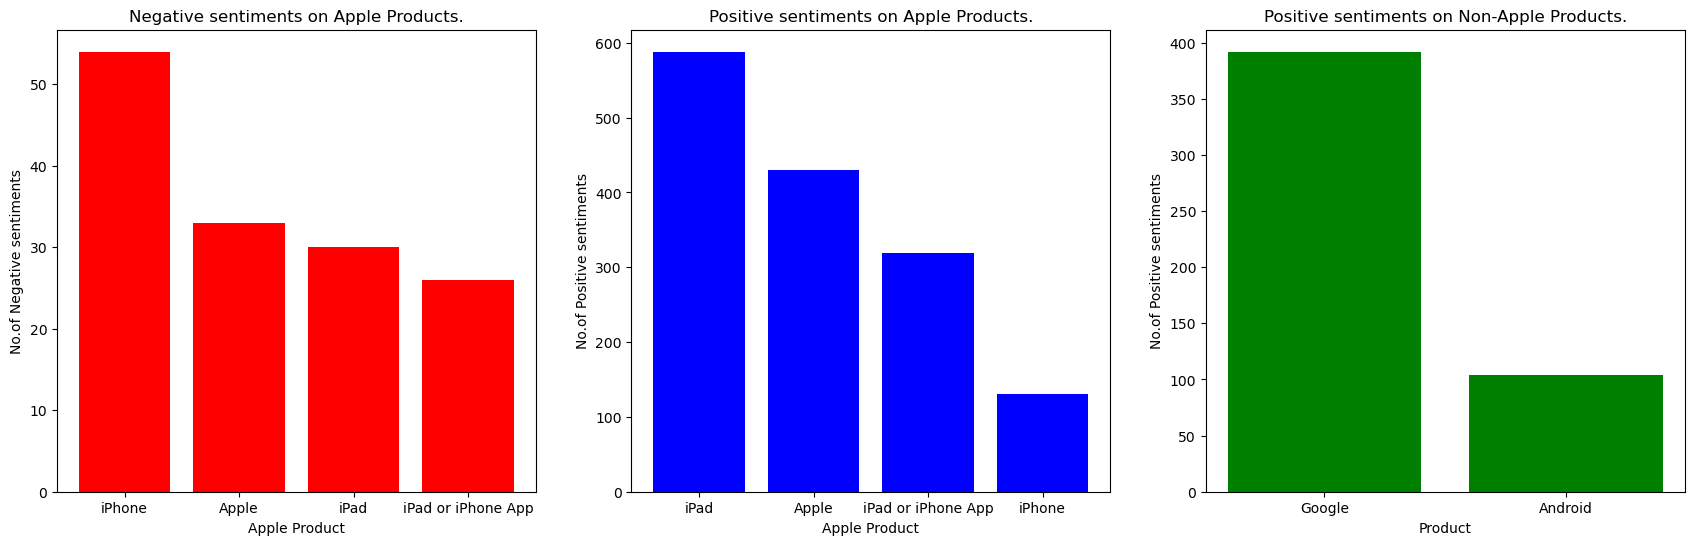

In [183]:
apple_neg = apple_df[apple_df['predicted_sentiment'] == 'Negative']
neg = apple_neg.emotion_in_tweet_is_directed_at.value_counts()
apple_pos = apple_df[apple_df['predicted_sentiment'] == 'Positive']
pos = apple_pos.emotion_in_tweet_is_directed_at.value_counts()
non_apple_pos = non_apple_df[non_apple_df['predicted_sentiment'] == 'Positive']
pos2 = non_apple_pos.brand.value_counts()
item = []
count = []
item2 = []
count2 = [] 
item3 = []
count3 = []
  
 
for key,value in neg.items():
    item.append(key)
    count.append(value)

for key,value in pos.items():
    item2.append(key)
    count2.append(value)

for key,value in pos2.items():
    item3.append(key)
    count3.append(value)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(21,6))

axes[0].bar(item,count, color='red')
axes[0].set_title('Negative sentiments on Apple Products.')
axes[0].set_xlabel('Apple Product')
axes[0].set_ylabel('No.of Negative sentiments')

# Plot data on the second subplot (axes[1])
axes[1].bar(item2[:-1],count2[:-1], color='blue')
axes[1].set_title('Positive sentiments on Apple Products.')
axes[1].set_xlabel('Apple Product')
axes[1].set_ylabel('No.of Positive sentiments')

axes[2].bar(item3,count3, color='green')
axes[2].set_title('Positive sentiments on Non-Apple Products.')
axes[2].set_xlabel('Product')
axes[2].set_ylabel('No.of Positive sentiments')


### Recommendations and Conclusion

As evident from the preceding visualizations, iPhones play a significant role in generating a substantial number of negative reviews concerning Apple. Conversely, iPads tend to contribute significantly to the positive feedback received by Apple. Meanwhile, Google receives a higher proportion of positive remarks compared to Android. However, it's worth noting that Apple still outperforms Google in terms of positive reviews. Based on these observations, we can formulate the following recommendations:

* Investigate the common issues or concerns raised by users of iPhones in negative reviews and take proactive steps to address them.

* Consider expanding the iPad product line or introducing new versions to maintain positive customer sentiment.

* Leverage the favorable feedback received by Google products and services to bolster brand reputation and customer loyalty.

* Understand the factors contributing to Apple's overall higher positive reviews compared to Google and utilize these insights to maintain a positive image.

In conclusion,the recommendations emphasize the importance of a customer-centric approach. Addressing customer concerns, improving product quality, and engaging with customers effectively are vital for maintaining a positive brand image.